<a href="https://colab.research.google.com/github/SinothileB/Prediction-of-Product-Sales/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :Sinothile Blose

You should load a fresh version of the original data set here https://docs.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view  using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

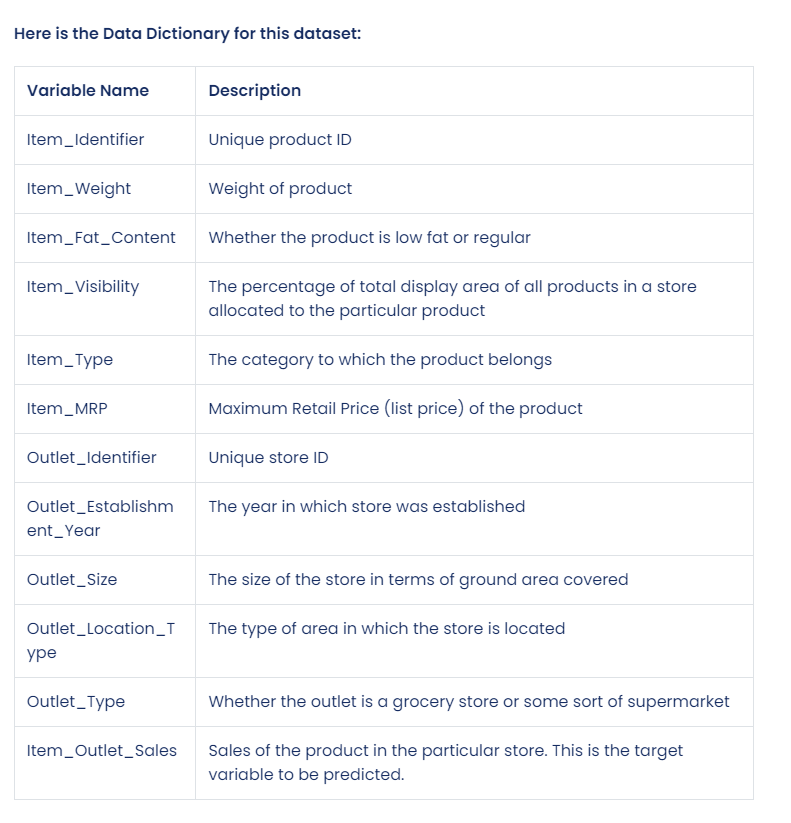

In [32]:
# Import packages
import pandas as pd
# Load data directly from url
fpath = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/sales_predictions_2023 - sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df_copy1 = df.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data

In [33]:
#drop duplicates
duplicated_r = df.duplicated()
duplicated_r.sum()

0

In [34]:
#any missing data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
#fix inconsistencies in categorical data
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [36]:
for x in cat_cols:
  # print the value counts for the column
  print(f"Value Counts for {x}")
  print(df[x].value_counts())

  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [37]:
#Need to fix Value Counts for Item_Fat_Content

df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("Low Fat","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")
# Check the value counts again to confirm
df["Item_Fat_Content"].value_counts()


low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [39]:
#dentify the features (X) and target (y):
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

Perform a train test split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# New import for scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,low fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,low fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,low fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


Create a preprocessing object to prepare the dataset for Machine Learning

In [42]:
#For numerics,#imputations,Scaling
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
impute_mean = SimpleImputer(strategy='mean')
#Create a StandardScaler for scaling numeric columns.
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [43]:
# Defining lists of ordinal features
ord_cols = ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type']
print("ordinal:", ord_cols)
#Use most frequent to impute
impute_na_ord = SimpleImputer(strategy='most_frequent')
## Making the OrdinalEncoder
Fat_Content_order = ['low fat','Regular']
Outlet_Size_order = ['Small','Medium','High']
Outlet_Location_order	 = ['Tier 1','Tier 2','Tier 3']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [Fat_Content_order, Outlet_Size_order, Outlet_Location_order]

ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
# Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

ordinal: ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['low fat', 'Regular'],
                                            ['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [44]:
# Defining list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("Nominal:", ohe_cols)
# Instantiate the individual preprocessors, use missing to impute
impute_na = SimpleImputer(strategy='constant', fill_value = "MISSING")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

Nominal: Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

Optional

Create a tuple for each transformer with the: name, the transformer object, and the list of columns.

In [45]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [46]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['low fat', 'Regular'],
                                             ['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

In [47]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

Instantiate the ColumnTransformer

In [48]:
# Instantiate with verbose_feature_names_out=False
from sklearn.compose import ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

Fit the Transformer on Training Data Only

In [60]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

Transform the training and test data

In [56]:
## Transform the training data
X_train_tf = col_transformer.transform(X_train)
# Transform the testing data
X_test_tf = col_transformer.transform(X_test)

In [70]:
X_train_tf.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,8.172487e-01,-0.712775,1.828109,1.327849,-0.740321,0.287374,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,5.563395e-01,-1.291052,0.603369,1.327849,1.350766,0.287374,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-1.315120e-01,1.813319,0.244541,0.136187,1.350766,0.287374,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.169219e+00,-1.004931,-0.952591,0.732018,-0.740321,-1.384048,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819e+00,-0.965484,-0.336460,0.493686,-0.740321,0.287374,-0.149914,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4377,4.213344e-16,-0.114462,-0.508205,-1.532139,1.350766,-1.384048,-1.384777,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2280,1.884604e+00,-0.074214,-0.859553,0.732018,1.350766,-1.384048,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8198,4.213344e-16,-0.047974,1.942997,-1.532139,1.350766,0.287374,1.084948,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7514,1.611836e+00,1.851567,1.799954,0.732018,1.350766,-1.384048,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3463,-1.119409e+00,-0.533682,-0.416764,0.732018,-0.740321,-1.384048,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
X_test_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,3.310089e-01,-0.776646,-0.998816,-1.293807,-0.740321,1.958796,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2957,-1.179892e+00,0.100317,-1.585194,-0.102145,-0.740321,-1.384048,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7031,3.784469e-01,-0.482994,-1.595784,0.136187,1.350766,0.287374,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1084,4.213344e-16,-0.415440,0.506592,-1.532139,1.350766,0.287374,1.084948,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
856,-6.426567e-01,-1.047426,0.886725,0.732018,1.350766,-1.384048,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
#Check nulls
X_train_tf.isna().sum().sum()

0

In [73]:
X_test_tf.isna().sum().sum()

0

In [66]:
#Confirm that all columns are numeric dtypes.
pd.set_option('display.max_rows', None)
X_train_tf.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content                   float64
Outlet_Size                        float64
Outlet_Location_Type               float64
Item_Identifier_DRA12              float64
Item_Identifier_DRA24              float64
Item_Identifier_DRA59              float64
Item_Identifier_DRB01              float64
Item_Identifier_DRB13              float64
Item_Identifier_DRB24              float64
Item_Identifier_DRB25              float64
Item_Identifier_DRB48              float64
Item_Identifier_DRC01              float64
Item_Identifier_DRC12              float64
Item_Identifier_DRC13              float64
Item_Identifier_DRC25              float64
Item_Identifier_DRC27              float64
Item_Identifier_DRC36              float64
Item_Identifier_DRC49              float64
Item_Identifier_DRD01              float64
Item_Identi

In [65]:
#Confirm that all columns are numeric dtypes.
X_test_tf.dtypes



Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content                   float64
Outlet_Size                        float64
Outlet_Location_Type               float64
Item_Identifier_DRA12              float64
Item_Identifier_DRA24              float64
Item_Identifier_DRA59              float64
Item_Identifier_DRB01              float64
Item_Identifier_DRB13              float64
Item_Identifier_DRB24              float64
Item_Identifier_DRB25              float64
Item_Identifier_DRB48              float64
Item_Identifier_DRC01              float64
Item_Identifier_DRC12              float64
Item_Identifier_DRC13              float64
Item_Identifier_DRC25              float64
Item_Identifier_DRC27              float64
Item_Identifier_DRC36              float64
Item_Identifier_DRC49              float64
Item_Identifier_DRD01              float64
Item_Identi